# Spam Filtering

In [1]:
!nvidia-smi

Tue May  3 14:07:49 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla K80           Off  | 00000000:00:04.0 Off |                    0 |
| N/A   42C    P8    27W / 149W |      0MiB / 11441MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [2]:
#Update Spacy for 3.0 functionality (new features), install GPU support for better performance
!pip install -U pip setuptools wheel
!pip install --upgrade 'spacy[cuda112]'

     |████████████████████████████████| 2.1 MB 12.4 MB/s 
     |████████████████████████████████| 1.1 MB 38.2 MB/s 
  Attempting uninstall: setuptools
    Found existing installation: setuptools 57.4.0
    Uninstalling setuptools-57.4.0:
      Successfully uninstalled setuptools-57.4.0
  Attempting uninstall: pip
    Found existing installation: pip 21.1.3
    Uninstalling pip-21.1.3:
      Successfully uninstalled pip-21.1.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.8.0 requires tf-estimator-nightly==2.8.0.dev2021122109, which is not installed.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.2/6.2 MB 14.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 181.6/181.6 KB 16.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 653.3/653.3 KB 24.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.1/10.1 MB 23.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 457.1/457.1 KB 17.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.8/42.8 KB 4.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.4/77.4 MB 8.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.6/58.6 KB 3.3 MB/s eta 0:00:00
  Attempting uninstall: typing-extensions
    Found existing installation: typing_extensions 4.2.0
    Uninstalling typing_extensions-4.2.0:
      Successfully uninstalled typing_extensions-4.2.0
  Attempting uninstall: smart-open
    Found existing installation: smart-open 6.0.0
    Uninstalling smart-open-6.0.0:
      Successfully uninstalled smart-open

In [3]:
!python -m spacy download en_core_web_sm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 21.8 MB/s eta 0:00:00
  Attempting uninstall: en-core-web-sm
    Found existing installation: en-core-web-sm 2.2.5
    Uninstalling en-core-web-sm-2.2.5:
      Successfully uninstalled en-core-web-sm-2.2.5
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


In [4]:
from typing import List
import pandas as pd
import spacy

import numpy as np
import sklearn

## Corpus visualization

In [5]:
# Download corpus
!wget http://www.dt.fee.unicamp.br/~tiago/smsspamcollection/smsspamcollection.zip
!unzip smsspamcollection.zip

--2022-05-03 14:09:11--  http://www.dt.fee.unicamp.br/~tiago/smsspamcollection/smsspamcollection.zip
Resolving www.dt.fee.unicamp.br (www.dt.fee.unicamp.br)... 143.106.12.20
Connecting to www.dt.fee.unicamp.br (www.dt.fee.unicamp.br)|143.106.12.20|:80... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://www.dt.fee.unicamp.br/~tiago/smsspamcollection/smsspamcollection.zip [following]
--2022-05-03 14:09:12--  https://www.dt.fee.unicamp.br/~tiago/smsspamcollection/smsspamcollection.zip
Connecting to www.dt.fee.unicamp.br (www.dt.fee.unicamp.br)|143.106.12.20|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 210521 (206K) [application/zip]
Saving to: ‘smsspamcollection.zip’

smsspamcollection.z 100%[===================>] 205.59K   130KB/s    in 1.6s    

2022-05-03 14:09:15 (130 KB/s) - ‘smsspamcollection.zip’ saved [210521/210521]

Archive:  smsspamcollection.zip
  inflating: readme                  
  inflating: SMSSpamCollection.txt  

In [6]:
df: pd.DataFrame
df = pd.read_csv('SMSSpamCollection.txt', sep='\t', header=None)
df.head(5)

,0,1
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       5572 non-null   object
 1   1       5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [8]:
df[df[1].isnull()].index

Int64Index([], dtype='int64')

## Spacy POS-tagging and tokenization

In [9]:
nlp = spacy.load('en_core_web_sm')

print("Pipeline:", nlp.pipe_names)

Pipeline: ['tok2vec', 'tagger', 'parser', 'attribute_ruler', 'lemmatizer', 'ner']


In [10]:
def tokenize(emails: List[str], nlp:spacy.lang.en.English) -> List[spacy.tokens.Doc]:
    tokens: List[spacy.tokens.Doc] = []
    tokens = list(nlp.pipe(emails, n_process=4))

    return tokens

In [11]:
doc_list = tokenize(df[1].to_list(), nlp)

tokens: List[List[str]] = []

for doc in doc_list:
  token_l: List[str] = []

  for token in doc:
    token_l.append(token)
  tokens.append(token_l)

df['tokenized'] = tokens

df.head()

,0,1,tokenized
0,ham,"Go until jurong point, crazy.. Available only ...","[Go, until, jurong, point, ,, crazy, .., Avail..."
1,ham,Ok lar... Joking wif u oni...,"[Ok, lar, ..., Joking, wif, u, oni, ...]"
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,"[Free, entry, in, 2, a, wkly, comp, to, win, F..."
3,ham,U dun say so early hor... U c already then say...,"[U, dun, say, so, early, hor, ..., U, c, alrea..."
4,ham,"Nah I don't think he goes to usf, he lives aro...","[Nah, I, do, n't, think, he, goes, to, usf, ,,..."


### Function for POS tagging, which
  - Takes the tokenized document (string) - a Doc object - as the only parameter
  - Returns a list with the POS tags (string) of each token in the document

In [12]:
def pos_tag(doc: spacy.tokens.Doc) -> List[str]:
    pos_list: List[str] = []
    
    for token in doc:
      pos_list.append(token.pos_)

    return pos_list

In [13]:
df['pos_tagged'] = df['tokenized'].apply(pos_tag)

df.head()

,0,1,tokenized,pos_tagged
0,ham,"Go until jurong point, crazy.. Available only ...","[Go, until, jurong, point, ,, crazy, .., Avail...","[VERB, ADP, PROPN, PROPN, PUNCT, ADJ, PUNCT, A..."
1,ham,Ok lar... Joking wif u oni...,"[Ok, lar, ..., Joking, wif, u, oni, ...]","[ADV, ADV, PUNCT, VERB, PROPN, PROPN, PROPN, P..."
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,"[Free, entry, in, 2, a, wkly, comp, to, win, F...","[ADJ, NOUN, ADP, NUM, DET, ADJ, NOUN, PART, VE..."
3,ham,U dun say so early hor... U c already then say...,"[U, dun, say, so, early, hor, ..., U, c, alrea...","[PRON, PROPN, VERB, ADV, ADJ, NOUN, PUNCT, NOU..."
4,ham,"Nah I don't think he goes to usf, he lives aro...","[Nah, I, do, n't, think, he, goes, to, usf, ,,...","[INTJ, PRON, AUX, PART, VERB, PRON, VERB, ADP,..."


## Spacy stopword filtering

In [14]:
from spacy.lang.en.stop_words import STOP_WORDS

In [15]:
def stopword_filter_and_lematize(doc: spacy.tokens.Doc) -> List[str]:
    filtered_lemmas: List[str] = []

    for token in doc:
      if not token.is_stop and token.pos_ != 'PUNCT':
        filtered_lemmas.append(token.lemma_)
    return filtered_lemmas

In [16]:
df['stopword_filtered_lemmas'] = df['tokenized'].apply(stopword_filter_and_lematize)

df.head()

,0,1,tokenized,pos_tagged,stopword_filtered_lemmas
0,ham,"Go until jurong point, crazy.. Available only ...","[Go, until, jurong, point, ,, crazy, .., Avail...","[VERB, ADP, PROPN, PROPN, PUNCT, ADJ, PUNCT, A...","[jurong, point, crazy, available, bugis, n, gr..."
1,ham,Ok lar... Joking wif u oni...,"[Ok, lar, ..., Joking, wif, u, oni, ...]","[ADV, ADV, PUNCT, VERB, PROPN, PROPN, PROPN, P...","[ok, lar, joke, wif, u, oni]"
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,"[Free, entry, in, 2, a, wkly, comp, to, win, F...","[ADJ, NOUN, ADP, NUM, DET, ADJ, NOUN, PART, VE...","[free, entry, 2, wkly, comp, win, FA, Cup, fin..."
3,ham,U dun say so early hor... U c already then say...,"[U, dun, say, so, early, hor, ..., U, c, alrea...","[PRON, PROPN, VERB, ADV, ADJ, NOUN, PUNCT, NOU...","[u, dun, early, hor, u, c]"
4,ham,"Nah I don't think he goes to usf, he lives aro...","[Nah, I, do, n't, think, he, goes, to, usf, ,,...","[INTJ, PRON, AUX, PART, VERB, PRON, VERB, ADP,...","[nah, think, go, usf, live]"


## Prepare the data for classification

In [17]:
df['label'] = df[0].apply(lambda x: 1 if (x=='spam') else 0)

In [18]:
from sklearn.model_selection import train_test_split

df_train: pd.DataFrame
df_test: pd.DataFrame

df_train, df_test = train_test_split(df, test_size=0.2, shuffle=True, random_state=42)

In [19]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [20]:
vectorizer: TfidfVectorizer

def dummy(x):
  return x
  
vectorizer = TfidfVectorizer(analyzer="word", token_pattern=None, tokenizer=lambda x:x, preprocessor=dummy)

In [21]:
x_train: np.ndarray 
x_test: np.ndarray
y_train: np.ndarray
y_test: np.ndarray

x_train = vectorizer.fit_transform(df_train['stopword_filtered_lemmas'])
y_train = df_train['label'].to_numpy()

x_test = vectorizer.transform(df_test['stopword_filtered_lemmas'])
y_test = df_test['label'].to_numpy()

print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(4457, 8173) (4457,)
(1115, 8173) (1115,)


## ML-based Classification

In [22]:
from sklearn import metrics

### Random Forest

In [23]:
from sklearn.ensemble import RandomForestClassifier

In [24]:
rnd_forest_clf_list: List[RandomForestClassifier]

rnd_forest_clf_list = [RandomForestClassifier(n_estimators=500, random_state=42), 
                       RandomForestClassifier(max_depth=10, random_state=42), 
                       RandomForestClassifier(max_depth=15, random_state=42), 
                       RandomForestClassifier(max_depth=20, random_state=42),
                       RandomForestClassifier(max_depth=30, n_estimators=300, random_state=42)]

for clf in rnd_forest_clf_list:
  clf.fit(x_train, y_train)

[0.979372197309417, 0.8932735426008969, 0.9237668161434978, 0.9443946188340807, 0.9659192825112107]
[0.9228187919463087, 0.6006711409395973, 0.714765100671141, 0.7919463087248322, 0.8724832214765101]
[<sklearn.metrics._plot.confusion_matrix.ConfusionMatrixDisplay object at 0x7fd9bd3b9f90>, <sklearn.metrics._plot.confusion_matrix.ConfusionMatrixDisplay object at 0x7fd9b743cd90>, <sklearn.metrics._plot.confusion_matrix.ConfusionMatrixDisplay object at 0x7fd9b734cc90>, <sklearn.metrics._plot.confusion_matrix.ConfusionMatrixDisplay object at 0x7fd9b72bc450>, <sklearn.metrics._plot.confusion_matrix.ConfusionMatrixDisplay object at 0x7fd9b728c750>]


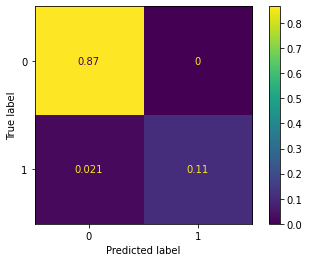

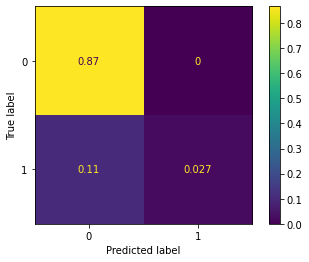

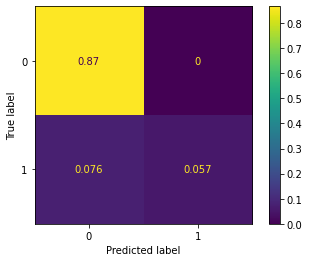

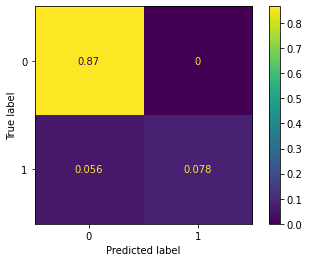

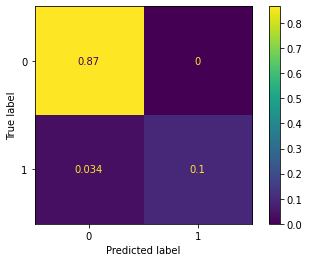

In [25]:
rnd_test_preds: List[np.ndarray]


rnd_acc_list: List[float]
rnd_bal_acc_list: List[float]
rnd_conf_mtx_list: List[np.ndarray] 

rnd_test_preds = []
rnd_acc_list = []
rnd_bal_acc_list = []
rnd_conf_mtx_list = []


for clf in rnd_forest_clf_list:
  pred = clf.predict(x_test)
  rnd_test_preds.append(pred)
  rnd_acc_list.append(clf.score(x_test, y_test))
  rnd_bal_acc_list.append(metrics.balanced_accuracy_score(y_test, pred))
  rnd_conf_mtx_list.append(metrics.ConfusionMatrixDisplay.from_estimator(clf, x_test, y_test, normalize='all'))

print(rnd_acc_list)
print(rnd_bal_acc_list)
print(rnd_conf_mtx_list)

### Naive Bayes

In [26]:
from sklearn.naive_bayes import MultinomialNB

0.967713004484305
0.8791946308724832


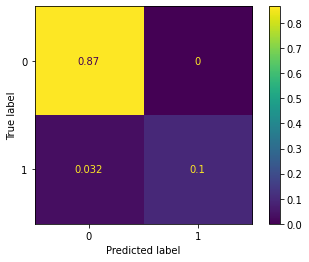

In [27]:
nb_clf: MultinomialNB

nb_test_pred: np.ndarray


nb_acc: float
nb_bal_acc: float
nb_conf_mtx: np.ndarray

nb_clf = MultinomialNB()
nb_clf.fit(x_train, y_train)

nb_test_pred = nb_clf.predict(x_test)

print(nb_clf.score(x_test, y_test))
print(metrics.balanced_accuracy_score(y_test, nb_test_pred))
metrics.ConfusionMatrixDisplay.from_estimator(nb_clf, x_test, y_test, normalize='all')

### LinearModel - SVM

In [28]:
from sklearn.svm import LinearSVC

0.9883408071748879
0.9592139452804758


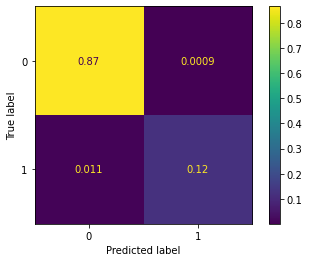

In [29]:
svm_clf: LinearSVC

svm_test_pred: np.ndarray


svm_acc: float
svm_bal_acc: float
svm_conf_mtx: np.ndarray

svm_clf = LinearSVC()
svm_clf.fit(x_train, y_train)

svm_test_pred = svm_clf.predict(x_test)

print(svm_clf.score(x_test, y_test))
print(metrics.balanced_accuracy_score(y_test, svm_test_pred))
metrics.ConfusionMatrixDisplay.from_estimator(svm_clf, x_test, y_test, normalize='all')